In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

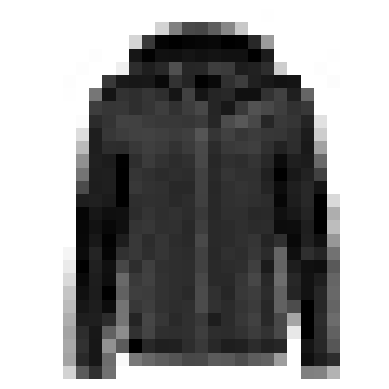

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

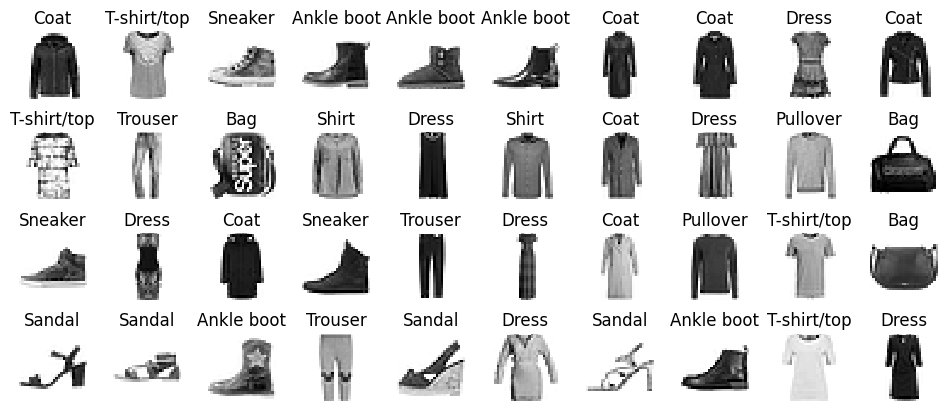

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [13]:
weights

array([[ 0.01866989,  0.03600749,  0.05672368, ..., -0.0350646 ,
        -0.02090257, -0.03314691],
       [ 0.06327805,  0.02307045,  0.03292378, ..., -0.02796644,
        -0.06803173,  0.03973836],
       [-0.00145639,  0.0407232 , -0.05108181, ..., -0.01027029,
         0.04207312, -0.03387568],
       ...,
       [ 0.02287406,  0.07050373,  0.06325051, ..., -0.05235196,
        -0.04375471, -0.03737786],
       [ 0.06589489,  0.06657596,  0.02039266, ..., -0.03393182,
        -0.03715621, -0.06686621],
       [ 0.063355  ,  0.03941314,  0.02057898, ...,  0.02267674,
         0.05274001,  0.03335868]], dtype=float32)

In [14]:
print(weights.shape)

(784, 300)


In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7115 - accuracy: 0.7639 - val_loss: 0.5216 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4904 - accuracy: 0.8285 - val_loss: 0.4394 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8432 - val_loss: 0.5524 - val_accuracy: 0.7934
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4165 - accuracy: 0.8543 - val_loss: 0.3960 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8609 - val_loss: 0.3756 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8653 - val_loss: 0.3695 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3666 - accuracy: 0.8694 - val_loss: 0.3628 - val_accuracy:

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [19]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

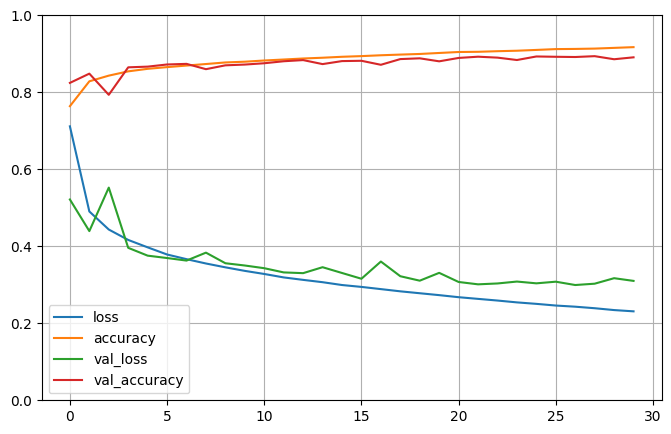

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8784


[0.3457437753677368, 0.8784000277519226]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 83ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = model.predict(X_new)
predicted_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 20ms/step


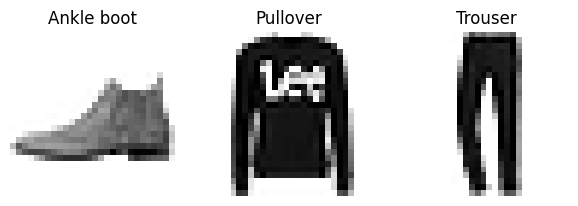

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

In [29]:

from keras.layers import Flatten, Dense
from keras import Sequential


relu_model = Sequential()
relu_model.add(Flatten(input_shape=[28, 28]))
relu_model.add(Dense(300,activation="relu"))
relu_model.add(Dense(100,activation="relu"))
relu_model.add(Dense(10,activation="softmax"))
relu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
relu_model.summary()

relu_history = relu_model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=20)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7282 - accuracy: 0.7631 - val_loss: 0.5197 - val_accuracy: 0.8250
Epoch 2/20
1719/1719 [==============

In [32]:
elu_model = Sequential()
elu_model.add(Flatten(input_shape=[28, 28]))
elu_model.add(Dense(300,activation="elu",input_shape=(X_train.shape[1],)))
elu_model.add(Dense(100,activation="elu"))
elu_model.add(Dense(10,activation="softmax"))
elu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
elu_model.summary()

elu_history = elu_model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=20)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6586 - accuracy: 0.7773 - val_loss: 0.5438 - val_accuracy: 0.8075
Epoch 2/20
1719/1719 [==============

In [33]:
leakyrelu_model = Sequential()
leakyrelu_model.add(Flatten(input_shape=[28, 28]))
leakyrelu_model.add(Dense(300,activation="leaky_relu",input_shape=(X_train.shape[1],)))
leakyrelu_model.add(Dense(100,activation="leaky_relu"))
leakyrelu_model.add(Dense(10,activation="softmax"))
leakyrelu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
leakyrelu_model.summary()

leakyrelu_history = leakyrelu_model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=20)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7157 - accuracy: 0.7623 - val_loss: 0.5676 - val_accuracy: 0.8030
Epoch 2/20
1719/1719 [==============

# Zad. 
Stwórz wykres porównujący metody. 

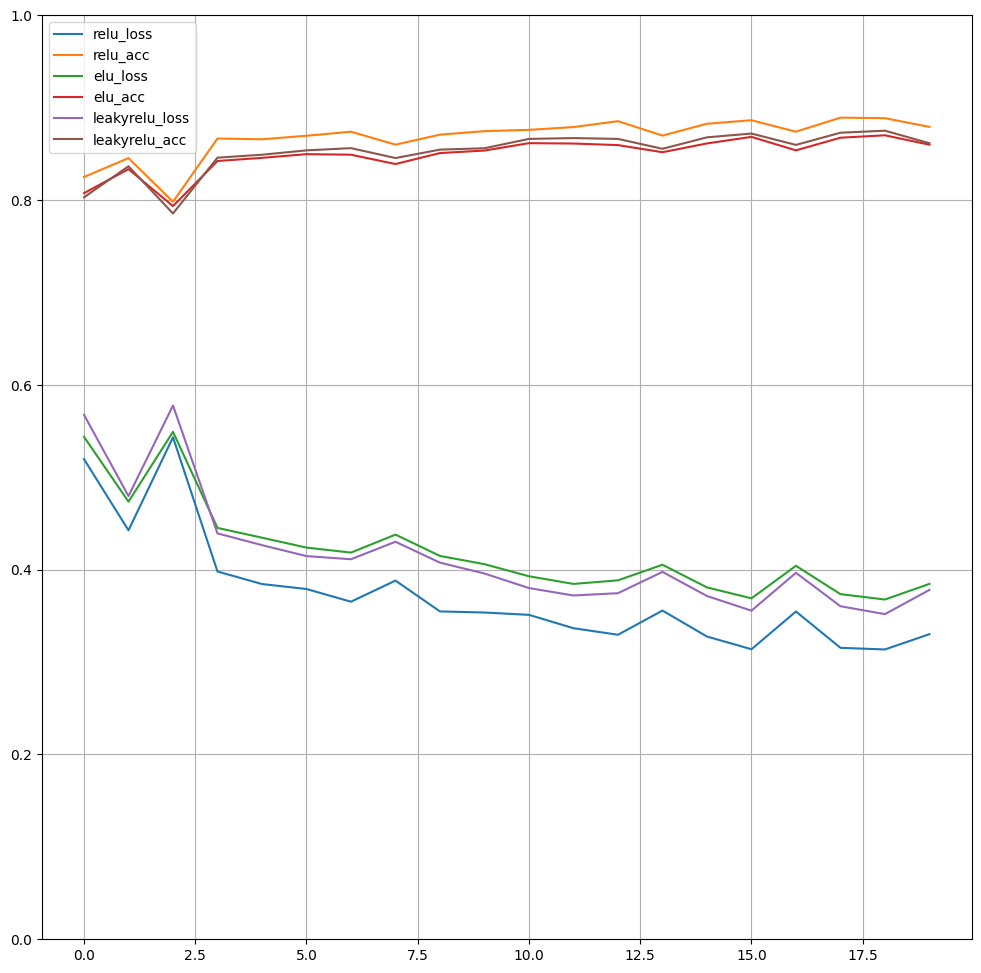

In [34]:
plt.figure(figsize=(12,12))

plt.plot(relu_history.history['val_loss'])
plt.plot(relu_history.history['val_accuracy'])
plt.plot(elu_history.history['val_loss'])
plt.plot(elu_history.history['val_accuracy'])
plt.plot(leakyrelu_history.history['val_loss'])
plt.plot(leakyrelu_history.history['val_accuracy'])
plt.legend([ 'relu_loss', 'relu_acc','elu_loss' ,'elu_acc','leakyrelu_loss', 'leakyrelu_acc'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()